In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
split = 'chemical_jan22_cv4'
train_assay_file = '../predictions/' + split + '/assay_matrix_discrete_train_scaff.csv'
test_assay_file = '../predictions/' + split + '/assay_matrix_discrete_test_scaff.csv'
aucs_file = '../predictions/' + split + '/2022_01_evaluation_all_data_python.csv'

In [13]:
train_assay_df = pd.read_csv(train_assay_file)
test_assay_df = pd.read_csv(test_assay_file)
aucs_df = pd.read_csv(aucs_file).set_index('assay_id')

#Filter, leave only certain modalities + late fusion
modalities = ['mobc_es_op', 'cp_es_op', 'ge_es_op', 'late_fusion_cs_ge', 'late_fusion_cs_ge_mobc', 'late_fusion_cs_mobc', 'late_fusion_ge_mobc']
aucs_df = aucs_df[aucs_df['descriptor'].isin(modalities)]
modalities_dict = {'mobc_es_op':'MO', 'cp_es_op':'CS', 'ge_es_op':'GE', 'late_fusion_cs_ge':'CS+GE', 'late_fusion_cs_ge_mobc':'CS+GE+MO', 'late_fusion_cs_mobc':'CS+MO', 'late_fusion_ge_mobc':'GE+MO'}

aucs_df['descriptor'].replace(modalities_dict, inplace=True)


assays = train_assay_df.columns[1:]

In [14]:
readouts = {}
hits = {}
for a in assays:
    readouts[a] = np.count_nonzero(~np.isnan(train_assay_df[a].to_numpy()))
    hits[a] = np.nansum(train_assay_df[a].to_numpy().astype(np.float))

c:\users\nikit\miniconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [15]:
readouts_df = pd.Series(readouts, name="readouts").to_frame()
hits_df = pd.Series(hits, name="hits").to_frame()

In [16]:
hits_df

,hits
1_1,2.0
10_19,1.0
10_20,1.0
100_277,6.0
100_278,12.0
...,...
9_18,2.0
90_256,3.0
91_257,8.0
92_258,10.0


In [17]:
aucs_df_readouts_hits_df  = pd.merge(aucs_df, readouts_df, left_index=True, right_index=True)
aucs_df_readouts_hits_df  = pd.merge(aucs_df_readouts_hits_df, hits_df, left_index=True, right_index=True)

In [18]:
aucs_df_readouts_hits_df

,auc,descriptor,auc_50,auc_70,auc_90,AP,pr_auc,readouts,hits
100_277,0.708333,CS+GE,True,True,False,0.466667,0.341667,32,6.0
100_277,0.583333,CS+GE+MO,True,False,False,0.365079,0.271429,32,6.0
100_277,0.500000,CS+MO,False,False,False,0.333333,0.241667,32,6.0
100_277,0.708333,GE+MO,True,True,False,0.466667,0.341667,32,6.0
100_277,0.291667,CS,False,False,False,0.324242,0.213973,32,6.0
...,...,...,...,...,...,...,...,...,...
9_18,0.200000,CS+MO,False,False,False,0.266667,0.183333,15,2.0
9_18,0.300000,GE+MO,False,False,False,0.309524,0.196429,15,2.0
9_18,0.300000,CS,False,False,False,0.309524,0.196429,15,2.0
9_18,0.400000,GE,False,False,False,0.392857,0.238095,15,2.0


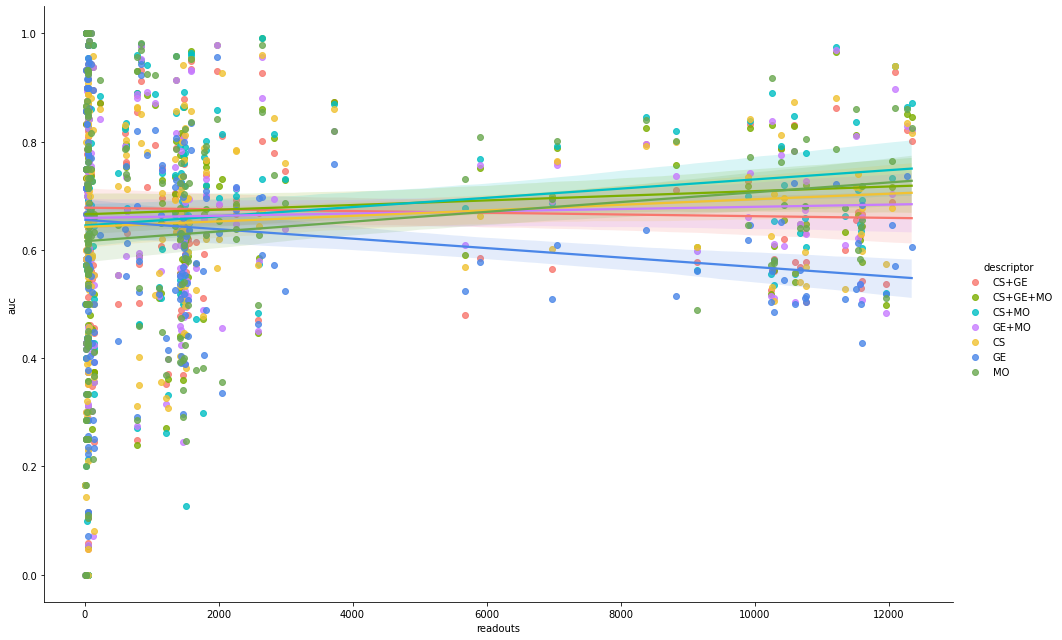

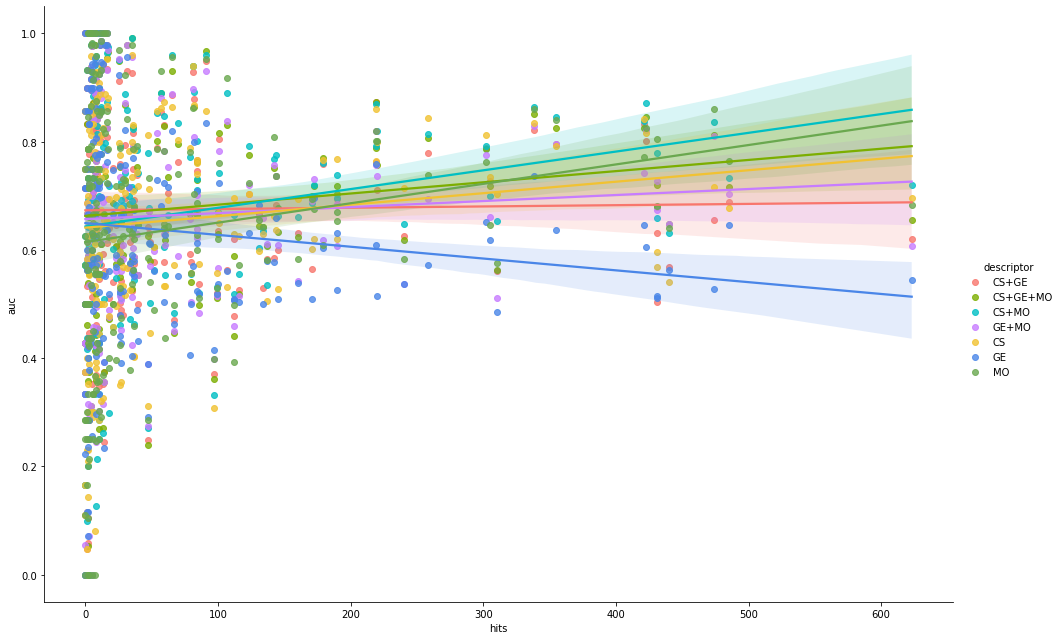

In [19]:
colors_dict = {'MO':'#6aa84f', 'CS':'#f1c232', 'GE':'#4a86e8', 'CS+GE':'#f8766d', 'CS+GE+MO':'#7cae00', 'CS+MO':'#00bfc4', 'GE+MO':'#c77cff'}

sb.lmplot(x="readouts", y="auc", hue="descriptor", data=aucs_df_readouts_hits_df, height = 9,aspect = 1.5, palette=colors_dict)
sb.lmplot(x="hits", y="auc", hue="descriptor", data=aucs_df_readouts_hits_df, height = 9,aspect = 1.5, palette=colors_dict)

In [20]:
assay_file = '../data/assay_matrix_discrete_270_assays.csv'
median_aucs_file = '../predictions/scaffold_median_python_fixed.csv'
assay_df = pd.read_csv(assay_file)
median_aucs_df = pd.read_csv(median_aucs_file).set_index('assay_id')

#Filter, leave only certain modalities + late fusion
modalities = ['mobc_es_op', 'cp_es_op', 'ge_es_op', 'late_fusion_cs_ge', 'late_fusion_cs_ge_mobc', 'late_fusion_cs_mobc', 'late_fusion_ge_mobc']
median_aucs_df = median_aucs_df[median_aucs_df['descriptor'].isin(modalities)]
modalities_dict = {'mobc_es_op':'MO', 'cp_es_op':'CS', 'ge_es_op':'GE', 'late_fusion_cs_ge':'CS+GE', 'late_fusion_cs_ge_mobc':'CS+GE+MO', 'late_fusion_cs_mobc':'CS+MO', 'late_fusion_ge_mobc':'GE+MO'}

median_aucs_df['descriptor'].replace(modalities_dict, inplace=True)

assays = assay_df.columns[1:]

readouts = {}
hits = {}
for a in assays:
    readouts[a] = np.count_nonzero(~np.isnan(assay_df[a].to_numpy()))
    hits[a] = np.nansum(assay_df[a].to_numpy().astype(np.float))

    
readouts_df = pd.Series(readouts, name="readouts").to_frame()
hits_df = pd.Series(hits, name="hits").to_frame()
median_aucs_df_readouts_hits_df  = pd.merge(median_aucs_df, readouts_df, left_index=True, right_index=True)
median_aucs_df_readouts_hits_df  = pd.merge(median_aucs_df_readouts_hits_df, hits_df, left_index=True, right_index=True)
    
colors_dict = {'MO':'#6aa84f', 'CS':'#f1c232', 'GE':'#4a86e8', 'CS+GE':'#f8766d', 'CS+GE+MO':'#7cae00', 'CS+MO':'#00bfc4', 'GE+MO':'#c77cff'}

sb.lmplot(x="readouts", y="auc", hue="descriptor", data=median_aucs_df_readouts_hits_df, height = 9,aspect = 1.5, palette=colors_dict)
sb.lmplot(x="hits", y="auc", hue="descriptor", data=median_aucs_df_readouts_hits_df, height = 9,aspect = 1.5, palette=colors_dict)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter-nmoshkov@broadinst-04e9f/PUMA/assay_matrix_nopains_nofreq_noemptyassays.csv'